# **Digit Recognition Using ANN**

### Importing the Libraries

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

import matplotlib.pyplot as plt

### Importing the Dataset

In [2]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train[10,11]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  91,
       137, 253, 254, 254, 254, 112,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

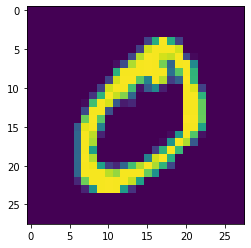

In [7]:
plt.imshow(X_train[1])

### Normalizing the data

In [8]:
X_train = X_train / 255
X_test = X_test / 255
X_train[10,11]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.35686275, 0.5372549 , 0.99215686,
       0.99607843, 0.99607843, 0.99607843, 0.43921569, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

### Building The Model

In [9]:
model = Sequential()

model.add(Flatten(input_shape = (28 , 28)))
model.add(Dense(128 ,activation = 'relu'))
model.add(Dense(32 ,activation = 'relu'))
model.add(Dense(10 ,activation = 'softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


### Configuring Parameters

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

### Training the Model

In [12]:
model_fit = model.fit(X_train, y_train, epochs=32, validation_split= 0.2)

Epoch 1/32
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2764 - accuracy: 0.9204 - val_loss: 0.1523 - val_accuracy: 0.9535
Epoch 2/32
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1156 - accuracy: 0.9656 - val_loss: 0.1128 - val_accuracy: 0.9649
Epoch 3/32
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0786 - accuracy: 0.9753 - val_loss: 0.0954 - val_accuracy: 0.9724
Epoch 4/32
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0618 - accuracy: 0.9808 - val_loss: 0.0956 - val_accuracy: 0.9719
Epoch 5/32
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.0916 - val_accuracy: 0.9744
Epoch 6/32
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0399 - accuracy: 0.9874 - val_loss: 0.0856 - val_accuracy: 0.9765
Epoch 7/32
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0316 - accuracy: 0.9894 - val_loss: 0.1109 - val_accura

### Evaluating the Model & Plotting the Metrics

In [13]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [14]:
y_pred = y_prob.argmax(axis=1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9781

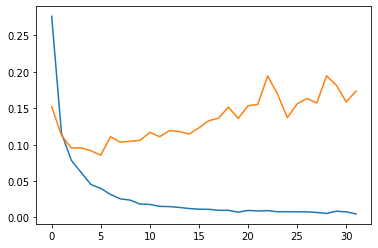

In [20]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])

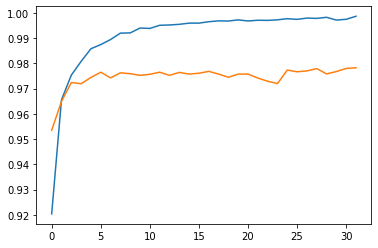

In [21]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])

# Predicting Results

1/1 [==============================] - 0s 51ms/step
The prediction is :  [2]


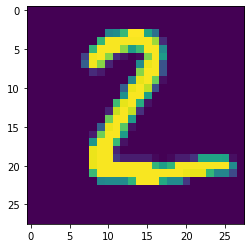

In [29]:
plt.imshow(X_test[1])
print("The prediction is : ",model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1))

1/1 [==============================] - 0s 25ms/step
The prediction is :  [1]


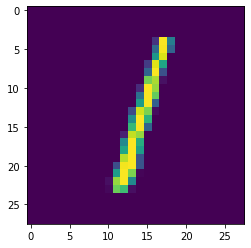

In [30]:
plt.imshow(X_test[2])
print("The prediction is : ",model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1))

1/1 [==============================] - 0s 23ms/step
The prediction is :  [0]


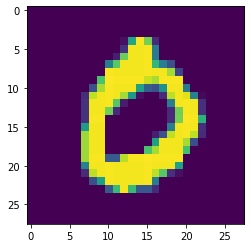

In [31]:
plt.imshow(X_test[3])
print("The prediction is : ",model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1))

1/1 [==============================] - 0s 71ms/step
The prediction is :  [4]


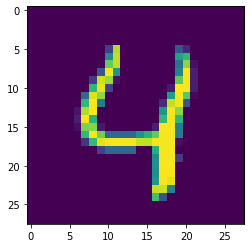

In [32]:
plt.imshow(X_test[4])
print("The prediction is : ",model.predict(X_test[4].reshape(1,28,28)).argmax(axis=1))

1/1 [==============================] - 0s 34ms/step
The prediction is :  [1]


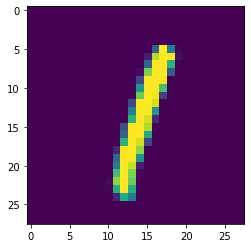

In [33]:
plt.imshow(X_test[5])
print("The prediction is : ",model.predict(X_test[5].reshape(1,28,28)).argmax(axis=1))